# Introduction

**Environment preparation**

* Create Python environment
```
python -m venv env-name
```
* Run venv
```
env-name\Scripts\Activate
```
* Intall python packages
```
pip install jupyter jupyterlab pandas matplotlib requests seaborn scipy scikit-learn
```
* Run Jupyter lab
```
jupyter lab
```

**Jupyter lab**

* Add code
* Add text
* Execute command
* Shortcuts (a, b, dd, Ctrl+Enter, Shift+Enter, x, c, v)



**Alternatives**

* Google Colab ([Colaboratory](https://colab.research.google.com/))
* Python scripts in VS Code






# Data processing

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Pandas tasks:
* Load data
* Standard data inspection (functions head(), tail(), describe(), isna(), shape)
* Select one attribute to variable 
    - Series and numpy compatibility
* dtype, index, columns
* Data selection - [], loc, iloc
* Data filtering and logical operators
* Add new column to dataframe
* Calculate new numberical attribute
* Data selection - comparison and negation
* Assign new values to selected rows from dataframe
* Use .apply() for rows and single column
* Use .groupby() for data aggregation

## Import used packages

In [158]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
import os

In [162]:
filename = 'mad3_cv1_data.csv'
path = f'C:\\Users\\proko\\Desktop\\university\\iii\\mad\\leactures\\1\\1\\data\\{filename}'

In [163]:
!which python

/c/Users/proko/Desktop/university/iii/mad/leactures/1/venv/Scripts/python


## The first step is to load the data into the Pandas DataFrame - in our case it is a csv file

In [164]:
data = pd.read_csv(path, sep=',', index_col=0)

## We shloud take a look on the data after loading so we know that everything is OK

### We will start with showing first/last N rows 
- There are several ways of doing that:
    - name of the dataframe
    - head()
    - tail()

### Show 5 first and last rows

In [31]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


### Show first 5 rows

In [32]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Show last 20 rows

In [33]:
data.tail(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000


## If we want to know if there are any missing values, the isna() function may render useful

In [41]:
data.isna().sum().sort_values()

MSSubClass          0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 80, dtype: int64

## We can show summary of common statistical characteristic of the data using the describe() function

In [42]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Dataframe has several useful properties
    - shape
    - dtypes
    - columns
    - index

#### Row and column count

In [44]:
data.shape

(1460, 80)

#### Datatypes of columns

In [50]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

#### Column names

In [51]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Row index values

In [52]:
data.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

## We may want to work with just one column not the whole dataframe
- We will select only the SalePrice columns and save it to another variable

In [57]:
data.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [58]:
data['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

## Columns are called Pandas Series - it shares a common API with Pandas DataFrame
- Pandas is numpy-backed so we can use Series as standard numpy arrays without any issues using the .values property

In [68]:
price = data.SalePrice.values

## e.g. find maximum price using Numpy and Pandas

In [69]:
data.SalePrice.max()

755000

In [73]:
data.SalePrice.sort_values().values[-1]

755000

In [74]:
np.max(price)

755000

## Data filtering using Pandas DataFrame
- There are several ways of filtering the data (similar logic to .Where() in C# or WHERE in SQL)
- We usually work with two indexers - .loc[] and .iloc[]

### The .iloc[] indexer works with positional indexes - very close to the way of working with the raw arrays
### The .loc[] indexer works with column names and logical expressions

### Select all rows and 3rd column of dataframe

In [76]:
data.iloc[:,2]

Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1460, dtype: float64

### Select all rows and LAST column of dataframe

In [78]:
data.iloc[: , -1]

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

### Select rows 15 to 22 and all columns

In [81]:
data.iloc[15:23, :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


### Select rows 15 to 22 and 3rd column

In [82]:
data.iloc[15:22, 3]

Id
16     6120
17    11241
18    10791
19    13695
20     7560
21    14215
22     7449
Name: LotArea, dtype: int64

## Select only a subset of columns to a new dataframe

In [86]:
c = [
    'SalePrice',
    'MSSubClass',
    'BldgType',
    'HouseStyle',
    'YearBuilt',
    'CentralAir'
]
df = data.loc[:, c].copy()
df

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,CentralAir
Id,,,,,,
1,208500,60,1Fam,2Story,2003,Y
2,181500,20,1Fam,1Story,1976,Y
3,223500,60,1Fam,2Story,2001,Y
4,140000,70,1Fam,2Story,1915,Y
5,250000,60,1Fam,2Story,2000,Y
...,...,...,...,...,...,...
1456,175000,60,1Fam,2Story,1999,Y
1457,210000,20,1Fam,1Story,1978,Y
1458,266500,70,1Fam,2Story,1941,Y


### Select only houses built in year 2000 or later

In [89]:
df[df.YearBuilt > 2000]

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,CentralAir
Id,,,,,,
1,208500,60,1Fam,2Story,2003,Y
3,223500,60,1Fam,2Story,2001,Y
7,307000,20,1Fam,1Story,2004,Y
12,345000,60,1Fam,2Story,2005,Y
14,279500,20,1Fam,1Story,2006,Y
...,...,...,...,...,...,...
1445,179600,20,1Fam,1Story,2004,Y
1452,287090,20,1Fam,1Story,2008,Y
1453,145000,180,TwnhsE,SLvl,2005,Y


### Select only houses that don't use GasA for heating (try != and ~ operators)

In [90]:
df[df.BldgType != '1Fam']

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,CentralAir
Id,,,,,,
10,118000,190,2fmCon,1.5Unf,1939,Y
18,90000,90,Duplex,1Story,1967,Y
24,129900,120,TwnhsE,1Story,1976,Y
35,277500,120,TwnhsE,1Story,2005,Y
40,82000,90,Duplex,1Story,1955,N
...,...,...,...,...,...,...
1432,143750,120,TwnhsE,1Story,1976,Y
1442,149300,120,TwnhsE,1Story,2004,Y
1450,92000,180,Twnhs,SFoyer,1970,Y


In [93]:
df[~(df.BldgType == '1Fam')]

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,CentralAir
Id,,,,,,
10,118000,190,2fmCon,1.5Unf,1939,Y
18,90000,90,Duplex,1Story,1967,Y
24,129900,120,TwnhsE,1Story,1976,Y
35,277500,120,TwnhsE,1Story,2005,Y
40,82000,90,Duplex,1Story,1955,N
...,...,...,...,...,...,...
1432,143750,120,TwnhsE,1Story,1976,Y
1442,149300,120,TwnhsE,1Story,2004,Y
1450,92000,180,Twnhs,SFoyer,1970,Y


### Select houses cheaper than 180k USD and with at least 2 bedrooms

In [94]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [145]:
data[(data.SalePrice < 180000) & (data.BedroomAbvGr >= 2)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,IsLuxury
Id,,,,,,,,,,,,,,,,,,,,,
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,False
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2008,WD,Abnorml,129900,90,False
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,0,1,2008,WD,Normal,118000,82,False
11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,129500,56,False
13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,144000,59,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,5,2006,WD,Normal,145000,16,False
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,7,2006,WD,Abnorml,84500,15,False
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,8,2007,WD,Normal,175000,22,False


### Select houses with 2 stories or air conditioning

In [100]:
data[(data.SalePrice < 180000) | (data.BedroomAbvGr >= 2)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## We can add new columns to the DataFrame as well

### Add a new column named Age for each house (current year - year built)

In [106]:
N_C = 'Age'

In [107]:
data[N_C] = 2021 - data.YearBuilt

In [108]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,18
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,45
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,20
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,106
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,21


### Add a new column IsLuxury with True value for houses with more than 3 bedrooms and price above 214k USD (.loc)

- How many luxury houses are in the dataset?

In [113]:
N_C_1 = 'IsLuxury'
data.loc[:, N_C_1] = False
data.loc[data.SalePrice > 214000, N_C_1] = True

In [114]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,IsLuxury
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,18,False
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,45,False
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,20,True
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,False
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,21,True


### BONUS: We may apply function to each row of the dataset and compute the value that way as well

## Pandas enables us to use aggregation functions for the data using the .groupby() function

### Compute counts for all the heating methods (groupby / value_counts)

In [120]:
data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [121]:
data.groupby('Heating').Heating.count()

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: Heating, dtype: int64

# Visualization

## Scatter plot
- Visualize relationship between SalePrice and GrLivArea.Use scatter plot from **Matplotlib**.

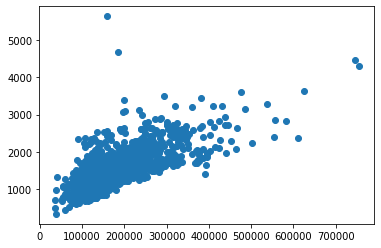

In [127]:
plt.scatter(data.SalePrice, data.GrLivArea)

### Modify figure size and add title

Text(0, 0.5, 'GrLivArea')

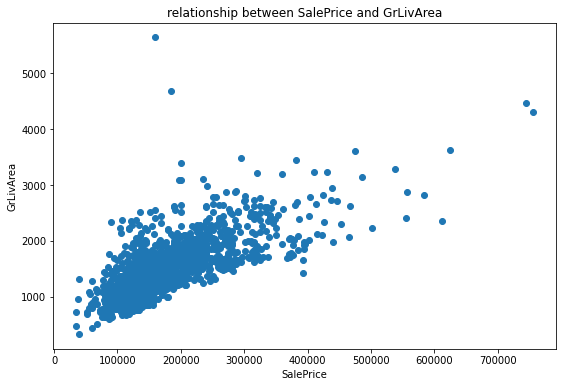

In [128]:
fig = plt.figure(figsize=(9, 6))
plt.scatter(data.SalePrice, data.GrLivArea)
plt.title('relationship between SalePrice and GrLivArea')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')

### Add axis labels

### Modify one of axis to logaritmic scale

### Add colors for data points based on CentralAir value.

### Try to use scatterplot from **Seaborn** library for scatter plot visualization.

#### Use series data for axes x and y

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

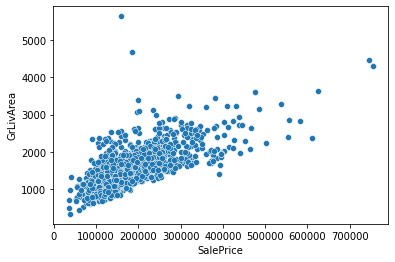

In [129]:
sns.scatterplot(x=data.SalePrice, y=data.GrLivArea)

### Use dataframe as source and column names for axes data

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

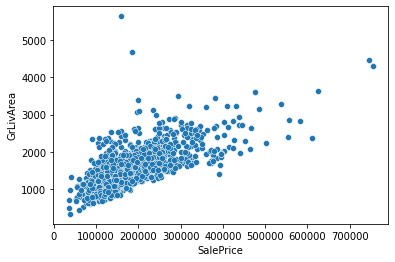

In [130]:
sns.scatterplot(data=data, x='SalePrice', y='GrLivArea')

### Resize plot and add color for markers based on CentralAir column

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

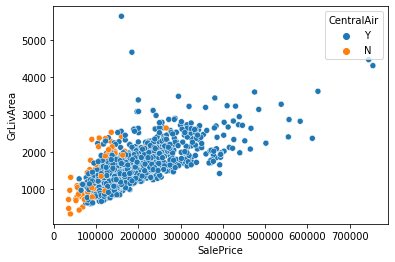

In [137]:
sns.scatterplot(data=data, x='SalePrice', y='GrLivArea', hue='CentralAir')

### Set color palette to *binary* scheme

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

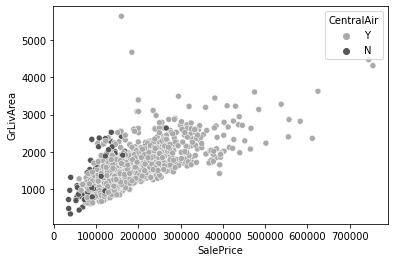

In [138]:
sns.scatterplot(data=data, x='SalePrice', y='GrLivArea', hue='CentralAir', palette='binary')

## Line plot
- Calculate and vizualize average house price in relationship to YearBuild.

In [139]:
series_1 = data.groupby('YearBuilt').SalePrice.mean()

In [142]:
series_1

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
            ...      
2006    251775.447761
2007    255362.734694
2008    348849.130435
2009    269220.000000
2010    394432.000000
Name: SalePrice, Length: 112, dtype: float64

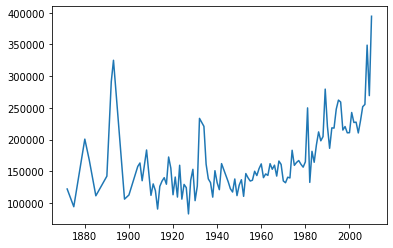

In [140]:
plt.plot(series_1.index, series_1.values)

### Create dataframe from the previous calculation and vizualize using Seaborn line plot (note: use .reset_index())

In [143]:
series_1.reset_index()
series_1.head()

YearBuilt
1872    122000.00
1875     94000.00
1880    200619.75
1882    168000.00
1885    111250.00
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

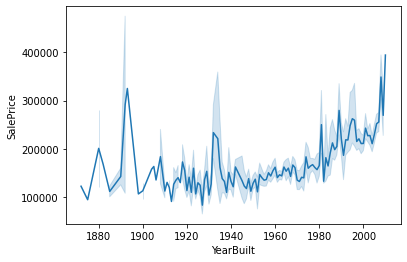

In [144]:
sns.lineplot(data=data, x='YearBuilt', y='SalePrice')

## Bar plot
- Calculate and vizualize how many of houses have CentralAir
- Use Barplot for visualization

In [186]:
number_of_categories = df.groupby('CentralAir').CentralAir.count()
number_of_categories

CentralAir
N      95
Y    1365
Name: CentralAir, dtype: int64

<BarContainer object of 2 artists>

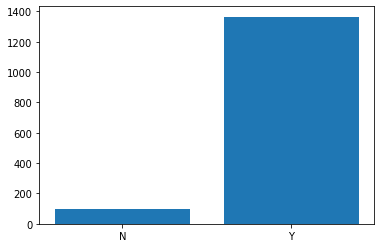

In [189]:
plt.bar(number_of_categories.index, number_of_categories.values)

### Vizualize number of building type and if they contains air conditioning using Seaborn

In [190]:
df_number_of_categories = df.groupby(['HouseStyle', 'CentralAir']).CentralAir.count().reset_index(name='Count')
df_number_of_categories

,HouseStyle,CentralAir,Count
0,1.5Fin,N,18
1,1.5Fin,Y,136
2,1.5Unf,N,4
3,1.5Unf,Y,10
4,1Story,N,41
5,1Story,Y,685
6,2.5Fin,N,1
7,2.5Fin,Y,7
8,2.5Unf,N,7
9,2.5Unf,Y,4


<AxesSubplot:xlabel='Count', ylabel='HouseStyle'>

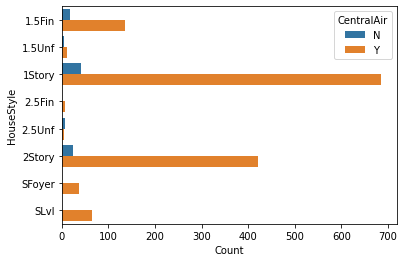

In [191]:
sns.barplot(data=df_number_of_categories, y='HouseStyle', x='Count', hue='CentralAir')

# Tasks
## Pandas (1 pt)
Add a new column *Undervalued* which is set to True in case that the house is priced bellow 163k USD and has both OverallQual and OverallCond higher than 5.

How many undervalued houses are in the dataset?

## Vizualization (1 pt)
Add to dataframe new attribute determining if the house was build before or after year 2000.

Create bar chart for number of houses depending on type of dwelling (attribute BldgType, use as a category axis) and added binary attribute about house age (use as a bar color).

# Solution

## I

In [153]:
name = 'Undervalued'
saleprice = 163000
higherthen = 5

data.loc[:, name] = False
data.loc[(data.SalePrice < saleprice) & (data.OverallQual > higherthen) & (data.OverallCond > higherthen), name] = True

In [154]:
len(np.where(data.Undervalued.values == True)[0])

120

## II

In [166]:
name2 = 'IsBefore2000'


data.loc[:, name2] = False
data.loc[data.YearBuilt < 2000, name2] = True

In [176]:
sol2 = data.groupby(['BldgType', name2]).BldgType.count().reset_index(name='Count')
sol2

,BldgType,IsBefore2000,Count
0,1Fam,False,308
1,1Fam,True,912
2,2fmCon,True,31
3,Duplex,True,52
4,Twnhs,False,14
5,Twnhs,True,29
6,TwnhsE,False,66
7,TwnhsE,True,48


<AxesSubplot:xlabel='Count', ylabel='BldgType'>

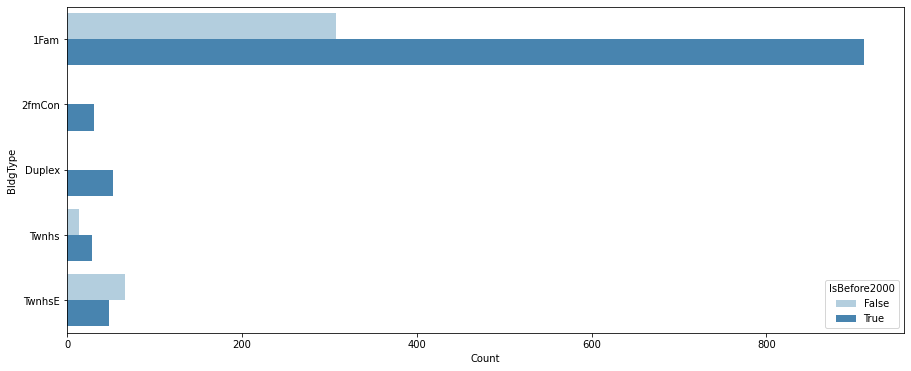

In [185]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(data=sol2, x='Count', y='BldgType', hue='IsBefore2000', palette="Blues")